# HyIPO: Hyped Initial Product Offerings

The purpose is to study past IPOs in order to assert the risk to invest on a new AI powered, cloud based product. We will analyze a set of historical data on IPOs provided from IPOScoop website https://www.iposcoop.com/scoop-track-record-from-2000-to-present/.

## Get the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r'SCOOP-Rating-Performance.xls')

In [3]:
data.shape

(3772, 12)

In [4]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'IPO SCOOP Rating Scorecard',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

The .xls file that contains the data, first has a summary of the IPO SCOOP ratings over the years. We begin by selecting this subset of data for a preliminary analysis. 

In [5]:
# Select subset data referring to IPO Scoop rating scorecard
scoops = data.iloc[3:24, 0:6]
scoops.shape

(21, 6)

In [6]:
scoops

,Unnamed: 0,Unnamed: 1,Unnamed: 2,IPO SCOOP Rating Scorecard,Unnamed: 4,Unnamed: 5
3,2020,205,198,180,18,0.909091
4,2019,231,207,186,21,0.898551
5,2018,228,223,191,32,0.856502
6,2017,186,182,157,25,0.862637
7,2016,107,106,97,9,0.915094
8,2015,173,173,157,16,0.907514
9,2014,261,261,234,27,0.896552
10,2013,230,230,209,21,0.908696
11,2012,146,146,134,12,0.917808
12,2011,143,143,130,13,0.909091


In [7]:
# Name the dataframe columns and sort by Year 
scoops.columns = ['Year', 'IPOs Priced', 'Calls', 'On Target', 
                  'Missed', 'Batting Average']
sorted_scoops = scoops.sort_values('Year')
sorted_scoops

,Year,IPOs Priced,Calls,On Target,Missed,Batting Average
23,2000,256,237,210,27,0.886076
22,2001,96,94,78,16,0.829787
21,2002,85,83,70,13,0.843373
20,2003,84,80,70,10,0.875
19,2004,249,232,201,31,0.866379
18,2005,236,226,198,28,0.876106
17,2006,240,237,212,25,0.894515
16,2007,279,256,230,26,0.898438
15,2008,50,47,43,4,0.914894
14,2009,63,61,50,11,0.819672


In [8]:
sorted_scoops['Year'] = sorted_scoops['Year'].astype(int)

Looking at the data above, Batting Average information, i.e. the ratio of the number of correct calls over the number of calls, is available for the years between 2000 and 2020. 

Let's plot below the batting average per year. 

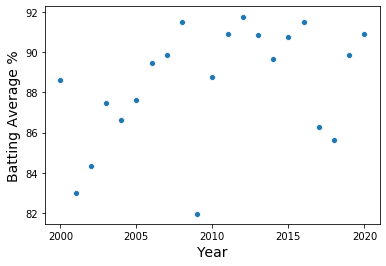

In [9]:
# Plot of batting average over the years

fig, axs = plt.subplots(1, 1, figsize=(6,4))
sns.scatterplot(
    y=sorted_scoops['Batting Average']*100, 
    x=sorted_scoops['Year']
)
axs.locator_params(integer=True)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Batting Average %',fontsize=14)
plt.show()

We note that there is no visible trend over the years, for example no clear improvement of batting average, which implies also no improvement on the number of correct calls on an IPO. 

## Data Exploration

Let's explore the rest of the data, which include historical information on trades, issuers (i.e. the companies that launched the IPO), lead managers (i.e. investment banks etc.), the offer stock price set by the lead managers, the opening price, etc. 

In [10]:
hist_trades = data.iloc[36:]
hist_trades.shape

(3736, 12)

There are 12 columns in the dataset. Let's assign the corresponding labels to each column.

In [11]:
# Name the dataframe columns 
hist_trades.columns = ['Trade Date', 'Issuer', 'Symbol', 'Lead Managers',
                       '$ Offer Price', 'Opening Price', '1st Day Close',
                       '1st Day % Price Change', '$ Change Opening', 
                       '$ Change Close', 'Star Ratings', 'Performed']
hist_trades = hist_trades.reset_index(drop=True)
hist_trades.head()

,Trade Date,Issuer,Symbol,Lead Managers,$ Offer Price,Opening Price,1st Day Close,1st Day % Price Change,$ Change Opening,$ Change Close,Star Ratings,Performed
0,2020-01-17 00:00:00,I-Mab,IMAB,Jefferies/ CICC,14,14.75,12.75,-0.0892857,0.75,-1.25,2,NaN
1,2020-01-17 00:00:00,LIZHI,LIZI,Credit Suisse/ Citigroup,11,11.03,11.63,0.0572727,0.03,0.63,1,NaN
2,2020-01-17 00:00:00,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.5,13.5,0,0,0,1,NaN
3,2020-01-17 00:00:00,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13,13.85,13.51,0.0392308,0.85,0.51,1,NaN
4,2020-01-24 00:00:00,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10,10.52,10.45,0.045,0.52,0.45,1,NaN


### Data Cleaning

#### Null values

We will drop any rows that have null values in all the columns. 

In [12]:
print('Shape before cleaning:', hist_trades.shape)
# Drop rows with all missing values
hist_trades.dropna(how='all', inplace=True)
print('Shape after cleaning:', hist_trades.shape)

Shape before cleaning: (3736, 12)
Shape after cleaning: (3693, 12)


Let's check the percentage of null values in each column. 

In [13]:
(hist_trades.isnull().sum() * 100 /hist_trades.shape[0]).sort_values(
    ascending=False)

Performed                 88.437585
Symbol                     1.083130
1st Day % Price Change     0.568643
Star Ratings               0.541565
$ Change Close             0.541565
$ Change Opening           0.541565
1st Day Close              0.541565
Opening Price              0.541565
$ Offer Price              0.541565
Lead Managers              0.541565
Issuer                     0.541565
Trade Date                 0.541565
dtype: float64

Column `Performed` has 88% of null values and most likely it will not be of use to get further insights on the data. It will be dropped at a later stage. The remaining columns have very few missing values. 

#### Duplicated rows

Let's check for any duplicated rows in the data. 

In [14]:
hist_trades[hist_trades.duplicated()]

,Trade Date,Issuer,Symbol,Lead Managers,$ Offer Price,Opening Price,1st Day Close,1st Day % Price Change,$ Change Opening,$ Change Close,Star Ratings,Performed
433,Trade,NaN,NaN,Lead/Joint-Lead,Offer,Opening,1st Day,1st Day,$ Change,$ Change,Star,NaN
434,Date,Issuer,Symbol,Managers,Price,Price,Close,% Px Chng,Opening,Close,Ratings,Performed
667,Trade,NaN,NaN,Lead/Joint-Lead,Offer,Opening,1st Day,1st Day,$ Change,$ Change,Star,NaN
668,Date,Issuer,Symbol,Managers,Price,Price,Close,% Px Chng,Opening,Close,Ratings,Performed
853,Trade,NaN,NaN,Lead/Joint-Lead,Offer,Opening,1st Day,1st Day,$ Change,$ Change,Star,NaN
854,Date,Issuer,Symbol,Managers,Price,Price,Close,% Px Chng,Opening,Close,Ratings,Performed
964,Trade,NaN,NaN,Lead/Joint-Lead,Offer,Opening,1st Day,1st Day,$ Change,$ Change,Star,NaN
965,Date,Issuer,Symbol,Managers,Price,Price,Close,% Px Chng,Opening,Close,Ratings,Performed
1142,Trade,NaN,NaN,Lead/Joint-Lead,Offer,Opening,1st Day,1st Day,$ Change,$ Change,Star,NaN
1143,Date,Issuer,Symbol,Managers,Price,Price,Close,% Px Chng,Opening,Close,Ratings,Performed


In [15]:
hist_trades.duplicated().sum()

38

We will drop the duplicates as they are all headers and not data that will be useful for the analysis further on. 

In [16]:
print('Shape before dropping duplicates:', hist_trades.shape)
hist_trades.drop_duplicates(inplace=True, keep=False)
hist_trades = hist_trades.reset_index(drop=True)
print('Shape after dropping duplicates:', hist_trades.shape)

Shape before dropping duplicates: (3693, 12)
Shape after dropping duplicates: (3653, 12)


### Exploratory Data Analysis (EDA)

Let's explore if there are any issuers that are the most common in the dataset. From the plot below the top 5 most common issuers are shown. We can conclude there aren't issuers that stand out.

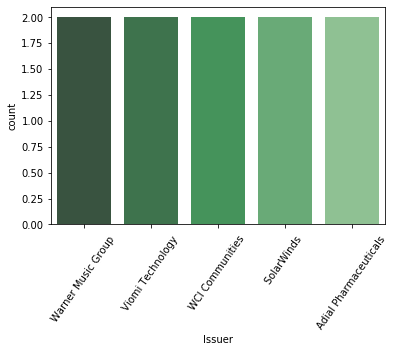

In [17]:
sns.countplot(x='Issuer', data=hist_trades, palette="Greens_d",
              order=hist_trades.Issuer.value_counts().iloc[:5].index)
plt.xticks(rotation=55)
plt.show()

Let's check if there are any Lead Managers that stand out. 

In [18]:
hist_trades['Lead Managers'].value_counts().head(10).to_frame()

,Lead Managers
Credit Suisse First Boston,51
Merrill Lynch,50
Goldman Sachs,49
EarlyBirdCapital,49
Lehman Brothers,48
Citigroup,41
Morgan Stanley,36
Credit Suisse,31
Deutsche Bank Securities,26
Friedman Billings Ramsey,26


Seems the most common one is **Credit Suisse First Boston**, that could be combined with **Credit Suisse** since the Credit Suisse Group retired the 'First Boston' name and merged with Credit Suisse in 2006 according to https://en.wikipedia.org/wiki/Credit_Suisse_First_Boston.

As we will see later on in the analysis, sometimes there is more than one Lead Managers per row. This column would thus need proper processing and the numbers above are not yet representative. 

We will also explore the `Trade Date` column for any data quality issues. 

In [19]:
hist_trades['Trade Date']

0       2020-01-17 00:00:00
1       2020-01-17 00:00:00
2       2020-01-17 00:00:00
3       2020-01-17 00:00:00
4       2020-01-24 00:00:00
               ...         
3648    2000-12-08 00:00:00
3649    2000-12-08 00:00:00
3650    2000-12-11 00:00:00
3651    2000-12-12 00:00:00
3652    2000-12-15 00:00:00
Name: Trade Date, Length: 3653, dtype: object

We can see that the column stores the dates as strings (type object) following the iso8601 format: YYYY-MM-DD hh:mm:ss. 

Checking for any null values:

In [20]:
# Num. of nulls
hist_trades['Trade Date'].isnull().sum()

20

In [21]:
# Show entries with null values in Trade Date
hist_trades[hist_trades['Trade Date'].isnull()]

,Trade Date,Issuer,Symbol,Lead Managers,$ Offer Price,Opening Price,1st Day Close,1st Day % Price Change,$ Change Opening,$ Change Close,Star Ratings,Performed
205,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
944,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1118,NaN,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407,NaN,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,NaN,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These entries also need to be cleaned since they do not contain data useful for the analysis, only the year, which is already included in the `Trade Date` column.

In [22]:
print('Shape before dropping nulls in Trade Date:', hist_trades.shape)

# Mask for null values
msk_nulls = hist_trades['Trade Date'].isnull()
hist_trades = hist_trades.loc[~msk_nulls, :]
hist_trades = hist_trades.reset_index(drop=True)

print('Shape before dropping nulls in Trade Date:', hist_trades.shape)

Shape before dropping nulls in Trade Date: (3653, 12)
Shape before dropping nulls in Trade Date: (3633, 12)


After cleaning the column, the entries for `Trade Date` are converted to datetime object. 

In [23]:
hist_trades['Trade Date'] = pd.to_datetime(hist_trades['Trade Date'], 
                                           errors = 'coerce')
hist_trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Trade Date              3632 non-null   datetime64[ns]
 1   Issuer                  3633 non-null   object        
 2   Symbol                  3633 non-null   object        
 3   Lead Managers           3633 non-null   object        
 4   $ Offer Price           3633 non-null   object        
 5   Opening Price           3633 non-null   object        
 6   1st Day Close           3633 non-null   object        
 7   1st Day % Price Change  3632 non-null   object        
 8   $ Change Opening        3633 non-null   object        
 9   $ Change Close          3633 non-null   object        
 10  Star Ratings            3633 non-null   object        
 11  Performed               407 non-null    object        
dtypes: datetime64[ns](1), object(11)
memory usage: 3

Let's remove any entries with missing values in columns `Trade Date`.

In [24]:
hist_trades = hist_trades.dropna(subset=['Trade Date'])
hist_trades.shape

(3632, 12)

We can now sort the data according to the trade date. 

In [25]:
# Sort dataframe by column 'Trade Date'
hist_trades_sorted = hist_trades.sort_values(by='Trade Date')
hist_trades_sorted.tail()

,Trade Date,Issuer,Symbol,Lead Managers,$ Offer Price,Opening Price,1st Day Close,1st Day % Price Change,$ Change Opening,$ Change Close,Star Ratings,Performed
199,2020-09-10,Prime Impact Acquisition I,PIAI.U,Goldman Sachs/ BofA Securities,10,10,10,0,0,0,1,NaN
202,2020-09-11,Ribbit LEAP,LEAP.U,JPMorgan,10,11.2,11.553,0.1553,1.2,1.553,1,Missed
203,2020-09-11,Tortoise Acquisition Corp. II,SNPR.U,Barclays/ Goldman Sachs,10,10.35,10.51,0.051,0.35,0.51,1,NaN
204,2020-09-11,TWC Tech Holdings II,TWCTU,Citigroup/ Deutsche Bank Securities,10,10.08,10.07,0.007,0.08,0.07,1,NaN
201,2020-09-11,Broadstone Acquisition,BSN.U,Citigroup,10,9.84,9.6,-0.04,-0.16,-0.4,1,NaN


In order to visualize the number of IPOs over the years, we can create a new column keeping the information on the year which will later be used for the plotting. 

In [26]:
# Create new column with yearly periods
hist_trades_sorted['year'] = pd.to_datetime(
    hist_trades_sorted['Trade Date']).dt.to_period('Y')

# Set new column as index
hist_trades_sorted.index = hist_trades_sorted['year']
hist_trades_sorted.index.rename('idx', inplace=True)
hist_trades_sorted.head(3)

,Trade Date,Issuer,Symbol,Lead Managers,$ Offer Price,Opening Price,1st Day Close,1st Day % Price Change,$ Change Opening,$ Change Close,Star Ratings,Performed,year
idx,,,,,,,,,,,,,
2000,2000-05-12,Sequoia Software,SQSW,Lehman Brothers,8,10.25,10.0625,0.257812,2.25,2.0625,2,NaN,2000
2000,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20,40,51,1.55,20,31,3,NaN,2000
2000,2000-05-18,US Unwired,UNWR,Donaldson Lufkin & Jenrette,11,11.0312,11.0625,0.00568182,0.03125,0.0625,1,NaN,2000


By grouping by the entries using idx, i.e. the yearly period, we can identify how many IPOs have been launched on the same year. To visualize the results, a bar plot is made below.

In [27]:
hist_trades_sorted.groupby('idx')['Trade Date'].count()

idx
2000    237
2001     94
2002     82
2003     80
2004    233
2005    226
2006    237
2007    256
2008     47
2009     61
2010    160
2011    143
2012    145
2013    230
2014    288
2015    173
2016    106
2017    181
2018    227
2019    221
2020    205
Freq: A-DEC, Name: Trade Date, dtype: int64

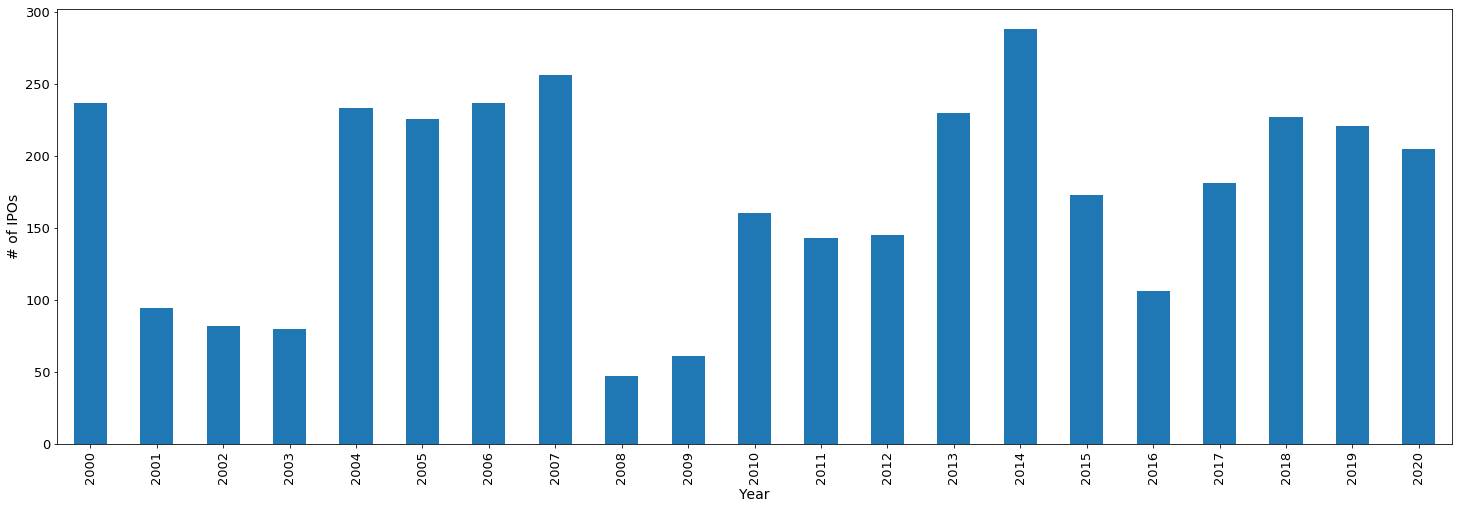

In [28]:
plt.figure(figsize=(25,8))
hist_trades_sorted.groupby('idx')['Trade Date'].count().plot(kind='bar')
plt.xlabel('Year', fontsize=14)
plt.ylabel('# of IPOs', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

We can notice than in many years the number of IPOs launched exceeded 100. However, a reduction is observed around 2002 and 2008. The former might be related to the Early 2000s recession, a decline in economic activity which mainly occurred in developed countries according to https://en.wikipedia.org/wiki/Early_2000s_recession. The latter, corresponds to the global financial crisis of 2007-2008 https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008.

#### Explore the numerical columns

Column `$ Offer Price` until column `Star Ratings` should contain numerical values. To explore the entries, descriptive analysis will be applied, after first having converted strings into numerical values. 

In [29]:
num_cols = ['$ Offer Price','Opening Price', '1st Day Close', 
            '1st Day % Price Change','$ Change Opening', 
            '$ Change Close', 'Star Ratings']

In [30]:
hist_trades_sorted[num_cols] = hist_trades_sorted[num_cols].apply(
    pd.to_numeric, errors='coerce')

In [31]:
hist_trades_sorted.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 3632 entries, 2000 to 2020
Freq: A-DEC
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Trade Date              3632 non-null   datetime64[ns]
 1   Issuer                  3632 non-null   object        
 2   Symbol                  3632 non-null   object        
 3   Lead Managers           3632 non-null   object        
 4   $ Offer Price           3632 non-null   float64       
 5   Opening Price           3632 non-null   float64       
 6   1st Day Close           3632 non-null   float64       
 7   1st Day % Price Change  3631 non-null   float64       
 8   $ Change Opening        3632 non-null   float64       
 9   $ Change Close          3632 non-null   float64       
 10  Star Ratings            3599 non-null   float64       
 11  Performed               407 non-null    object        
 12  year                    3632 non

In [32]:
# Descriptive analysis on numerical columns
hist_trades_sorted[num_cols].describe()

,$ Offer Price,Opening Price,1st Day Close,1st Day % Price Change,$ Change Opening,$ Change Close,Star Ratings
count,3632.000000,3632.000000,3632.000000,3631.000000,3632.000000,3632.000000,3599.000000
mean,14.434818,16.546483,16.800797,0.135866,2.113353,2.370136,1.781050
std,6.332729,9.339276,9.928153,0.286003,4.741658,5.696265,0.893971
min,0.000000,0.650000,0.650000,-0.410833,-6.850000,-6.340000,1.000000
25%,10.000000,10.050000,10.050000,0.000000,0.000000,0.000000,1.000000
50%,14.000000,14.800000,14.900000,0.038462,0.440000,0.500000,1.000000
75%,18.000000,20.210000,20.500000,0.195942,2.500000,3.000000,3.000000
max,91.000000,120.000000,132.990000,3.538519,65.000000,95.540000,5.000000


From the descriptive analysis above, it can be noticed that the min value for `$ Offer Price` is 0. Here, I will make the assumption that it is not possible for an IPO to have an offer price of 0, thus I will consider such entries as invalid. They will be removed from the dataset. 

In [33]:
print('Shape before removing rows with 0 offer price', hist_trades_sorted.shape)

# Mask to remove rows with 0 Offer Price
msk_no_offer_price = (hist_trades_sorted['$ Offer Price'] == 0)
hist_trades_sorted = hist_trades_sorted[~msk_no_offer_price]

print('Shape before removing rows with 0 offer price', hist_trades_sorted.shape)

Shape before removing rows with 0 offer price (3632, 13)
Shape before removing rows with 0 offer price (3630, 13)


In [34]:
hist_trades_sorted[num_cols].describe()

,$ Offer Price,Opening Price,1st Day Close,1st Day % Price Change,$ Change Opening,$ Change Close,Star Ratings
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3598.000000
mean,14.442771,16.555156,16.809651,0.135903,2.114074,2.371040,1.781267
std,6.325399,9.334533,9.923715,0.286034,4.742864,5.697704,0.894001
min,1.000000,1.150000,1.150000,-0.410833,-6.850000,-6.340000,1.000000
25%,10.000000,10.050000,10.050000,0.000000,0.000000,0.000000,1.000000
50%,14.000000,14.800000,14.900000,0.038462,0.435000,0.500000,1.000000
75%,18.000000,20.230000,20.500000,0.196185,2.500000,3.000000,3.000000
max,91.000000,120.000000,132.990000,3.538519,65.000000,95.540000,5.000000


We can visually inspect these features below. `Star Ratings` has discrete values, while all other columns contain continuous values. Another observation is that many of the distributions are skewed. Since we will not be using a linear regression model, there is no need to apply any transformation, such as log. 

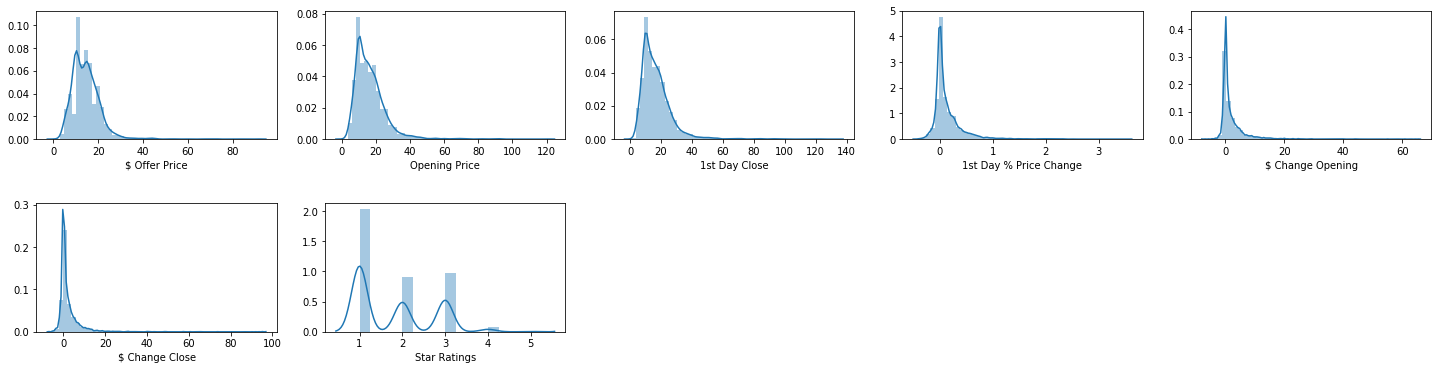

In [35]:
fig, axs = plt.subplots(figsize=(25,13))
fig.subplots_adjust(hspace = 0.5, wspace=0.2)

count=1

for col in hist_trades_sorted[num_cols].columns:
    plt.subplot(4,5,count)    
    sns.distplot(hist_trades_sorted[col])
    count+=1
plt.show() 

#### Explore column Lead Managers of type object

In [36]:
hist_trades_sorted[['Issuer', 'Symbol', 'Lead Managers']].tail(10)

,Issuer,Symbol,Lead Managers
idx,,,
2020,BCTG Acquisition,BCTG,SVB Leerink
2020,Cohn Robbins Holdings,CRHCU,Credit Suisse
2020,Industrial Tech Acquisitions,ITACU,Maxim Group
2020,NavSight Holdings,NSH.U,Credit Suisse
2020,Starboard Value Acquisition,SVACU,UBS Investment Bank/ Stifel/ Cowen
2020,Prime Impact Acquisition I,PIAI.U,Goldman Sachs/ BofA Securities
2020,Ribbit LEAP,LEAP.U,JPMorgan
2020,Tortoise Acquisition Corp. II,SNPR.U,Barclays/ Goldman Sachs
2020,TWC Tech Holdings II,TWCTU,Citigroup/ Deutsche Bank Securities


We can notice that column `Lead Managers` contain different managers separated with '/' from one another. Let's investigate how many managers there are per row as this might have some correlation with the target value and assign the results into a new column `Num. of managers`.

In [37]:
# Split Lead Managers by '/' into list
hist_trades_sorted['Lead Managers'] = hist_trades_sorted['Lead Managers'].str.split('/')

# Count elements in that list
hist_trades_sorted['Num. of managers'] = hist_trades_sorted['Lead Managers'].apply(len)

In [38]:
hist_trades_sorted['Num. of managers'].describe()

count    3630.000000
mean        2.184573
std         1.296320
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Num. of managers, dtype: float64

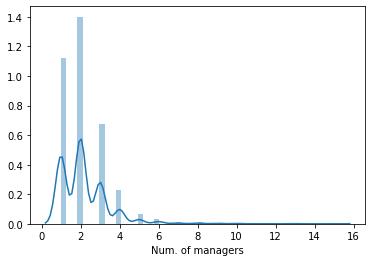

In [39]:
sns.distplot(hist_trades_sorted['Num. of managers'])
plt.show()

From the plot above, it can be seen that there have been few cases where the number of managers is significantly larger than the median value of 2. 

For the futher analysis, I will make the assumption that the Hedge Fund manager has the possibility to invest at the offer price of an IPO. Therefore, a meaningful target value, or else y, is the `1st Day % Price Change`, which signifies the relative difference of the `1st Day Close` to the `$ Offer Price`. Let's investigate the positive linear correlations of the columns with `1st Day % Price Change`.

In [40]:
# Linear correlations with target value
hist_trades_sorted.corr()['1st Day % Price Change'].sort_values(
    ascending=False)[1:20].to_frame()

,1st Day % Price Change
$ Change Close,0.920540
$ Change Opening,0.804900
1st Day Close,0.671030
Opening Price,0.560406
Star Ratings,0.491954
$ Offer Price,0.223387
Num. of managers,0.007075


Naturally, the `$ Change Close` is highly correlated to `1st Day % Price Change`, since the former is the difference between the 1st day close price and the offer price, while the latter is the relative difference between the two. The `$ Change Opening` has the 2nd highest correlation to the target and refers to the difference between the opening price and the offer price. Interestingly, the number of managers in an IPO does not seem to have an impact on the `1st Day % Price Change`.

Let's check the distribution of the target value. 

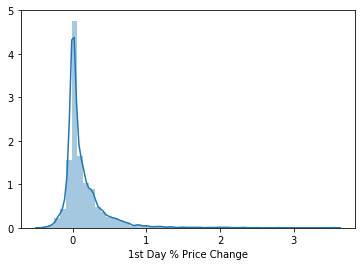

In [41]:
sns.distplot(hist_trades_sorted['1st Day % Price Change']);

It looks like there is a long tail to the right, where the 1st day price change was significant. If one would be able to identify such IPOs, this could result in rewarding investment. 

We can also look which Lead Managers appear at the top 10 with higher 1st Day price change. Goldman Sachs and Credid Suisse appear ofter among the Lead Managers with the favorable price changes. Note: the column `Lead Managers` would need proper cleaning, checking for spelling errors, grouping lead managers that refer to the same entity (as already mentioned in cell Out[19] for Credit Suisse First Boston and Credit Suisse) but due to time constrains it is presently skipped. 

In [42]:
hist_trades_sorted[hist_trades_sorted['1st Day % Price Change'] > 0.35].sort_values(
    by='1st Day % Price Change', ascending=False)[:10]

,Trade Date,Issuer,Symbol,Lead Managers,$ Offer Price,Opening Price,1st Day Close,1st Day % Price Change,$ Change Opening,$ Change Close,Star Ratings,Performed,year,Num. of managers
idx,,,,,,,,,,,,,,
2005,2005-08-04,Baidu.com,BIDU,"[Goldman Sachs, Creidt Suisse First Boston]",27.0,66.00,122.5400,3.538519,39.00,95.5400,4.0,NaN,2005,2
2000,2000-06-27,Marvell Technology Group,MRVL,"[Goldman, Sachs]",15.0,47.50,56.6250,2.775000,32.50,41.6250,4.0,NaN,2000,1
2020,2020-08-14,CureVac N.V.,CVAC,"[BofA Securities, Jefferies, Credit Suisse]",16.0,44.00,55.9000,2.493750,28.00,39.9000,2.0,Missed,2020,3
2000,2000-06-30,StorageNetworks,STOR,"[Goldman, Sachs]",27.0,92.00,90.2500,2.342593,65.00,63.2500,3.0,NaN,2000,1
2019,2019-12-19,Monopar Therapeutics,MNPR,[JonesTrading],8.0,8.35,26.5000,2.312500,0.35,18.5000,1.0,NaN,2019,1
2000,2000-06-01,ONI Systems,ONIS,"[Goldman, Sachs]",25.0,80.00,82.5625,2.302500,55.00,57.5625,4.0,NaN,2000,1
2000,2000-06-23,Accelerated Networks,ACCL,[Credit Suisse First Boston],15.0,33.00,47.8750,2.191667,18.00,32.8750,2.0,NaN,2000,1
2000,2000-07-28,Avici Systems,AVCI,[Morgan Stanley Dean Witter],31.0,90.00,96.7500,2.120968,59.00,65.7500,5.0,NaN,2000,1
2000,2000-08-08,Active Power,ACPW,"[Goldman, Sachs]",17.0,40.00,52.7500,2.102941,23.00,35.7500,3.0,NaN,2000,1


## Machine Learning Part

In this case study, we are interested to rank IPOs in terms of expected returns. For simplicity reasons, we will assume two classes, one that an IPO is not worth investing (label 0), and another that an IPO is worth investing (label 1). It is thus treated as a ***binary classification problem***. 

To be able to differentiate between the two, a threshold can be set depending on when we consider an IPO to be successful or worth investing. This value is somewhat arbitrary, but for the sake of the analysis, we set it at 0.10. 

In [43]:
hist_trades_sorted.reset_index(drop=True);
hist_trades_sorted.shape

(3630, 14)

#### Target value y

We will create a new column named `IPO performance` that will contain the labels 1, 0 depending if the IPO was profitable or not, according to the chosen threshold above. This will be the target for the machine learning (ML) analysis. 

In [44]:
# Assign label to the target feature
hist_trades_sorted['IPO performance'] = hist_trades_sorted[
    '1st Day % Price Change'].apply(lambda x: 1 if x > 0.10 else 0)
hist_trades_sorted['IPO performance'].describe()

count    3630.000000
mean        0.376860
std         0.484666
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: IPO performance, dtype: float64

Let's check how many samples we have in each class. 

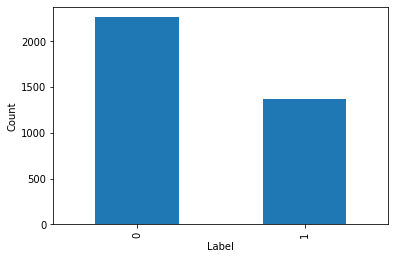

In [45]:
hist_trades_sorted['IPO performance'].value_counts().plot.bar()
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

The two classes are quite balanced, avoiding the so-called class imbalance problem which could result in building a model that correctly classifies data points from the most prominent class. 

#### X features

Below the subset of columns that will be selected as x features is defined. I will only use the `$ Change Opening` and `$ Offer Price` and not the `Opening Price` since they are fully correlated. 

In [46]:
hist_trades_sorted.dropna(subset=['$ Change Opening', '$ Offer Price', 
                                  'Star Ratings', 'Num. of managers', 
                                  'IPO performance'], 
                          inplace=True)

### Split dataset into training and validation sets

In [47]:
from sklearn.model_selection import train_test_split

# Shuffle the rows in the dataframe
hist_trades_sorted = hist_trades_sorted.sample(
    frac=1, random_state=0).reset_index(drop=True)

# Get X, y data
cols = ['$ Change Opening', '$ Offer Price', 'Star Ratings', 
        'Num. of managers']
X = hist_trades_sorted.loc[:,cols].values
y = hist_trades_sorted['IPO performance'].values

# Split into train and test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=0)

print(f'Shape of train dataset: {X_tr.shape}')
print(f'Shape of test dataset: {X_te.shape}')

Shape of train dataset: (2878, 4)
Shape of test dataset: (720, 4)


### Model 1: Logistic Regression

Scikit-learn implements a LogisticRegression object that can address the binary classification problem. In order to avoid any issues with the features scale, we can also encapsulate the estimator in a pipeline with a StandardScaler. 

Last, we compute the accuracy achieved on the train and test set. 

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Estimator
log_regr = make_pipeline(StandardScaler(), LogisticRegression())

# Fit estimator to train data
log_regr.fit(X_tr, y_tr)

# Accuracy 
train_accuracy = log_regr.score(X_tr, y_tr)
test_accuracy = log_regr.score(X_te, y_te)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")

Train accuracy: 0.863
Test accuracy: 0.851


We note that the estimator correctly classified 86% of the points of the train set, and 85% from the test set. Based on the accuracies between train and test sets, there is no indication of overfitting. 

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

# Create k-fold object
kfold = KFold(n_splits=4, shuffle=True, random_state=0)
scores = cross_validate(log_regr, X_tr, y_tr, cv=kfold, return_train_score=True)
print('Train scores:', scores['train_score'])
print('Test scores:', scores['test_score'])

Train scores: [0.86422614 0.85773865 0.85919407 0.86567855]
Test scores: [0.85       0.87638889 0.87482615 0.84700974]


We can see that even when k-fold cross-validation is used, where the train set was split into 4 folds and the algorithm ran 4 times to train the estimator, the scores only marginally improved. 

Please note that for the case study above, the assumption had to be made that the temporal order of data is not important and that the validation set does not always need to come chronologically after the train set.

### Model 2: Decision tree

As a second model, we will use decision tree on the data, starting by a simple decision tree with a depth of one that minimizes the Gini impurity at each split. 

In [50]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=0)

# Fit decision tree
dt.fit(X_tr, y_tr)

# Get train accuracy
print(f"Train accuracy: {dt.score(X_tr, y_tr):.3f}")

# Get test accuracy
print(f"Test accuracy: {dt.score(X_te, y_te):.3f}")

Train accuracy: 0.864
Test accuracy: 0.856


The above accuracy of around 85% is already much better than the 'most-frequent' baseline. 

In [51]:
pd.value_counts(y_te, normalize=True)

0    0.640278
1    0.359722
dtype: float64

### Model 3: Random forest

As a third model, we will combine decision trees into a random forest estimator. 

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

# A large Random forest
rf_10 = RandomForestClassifier(
    n_estimators=30, max_depth=None, random_state=0)

# Fit estimator
rf_10.fit(X_tr, y_tr)

# Mean test score of a random forest 
rf_scores = cross_validate(rf_10, X_te, y_te, cv=10)
print('Random forest - mean test {:.3f}'.format(
    np.mean(rf_scores['test_score'])))

Random forest - mean test 0.839


The test accuracy did not show significant improvement compared to the simple decision tree model. Of course, parameters such as the number of estimators could be used as hyper parameters to find the optimal value by doing a grid search. Time constraints do not permit to investigate this further. 

## Summary

The three ML models that were considered in this analysis give similar performance in terms of accuracy. Also, there seems to be no issue with overfitting based on the scores obtained on the test sets. One could further improve the analysis, for example with processing the `Lead Managers` column to use additional features to train the models. 
